###  纸板（cardboard）、玻璃（glass）、金属（metal）、纸（paper）、塑料（plastic）、其他垃圾（trash）

In [43]:
import os

# data_dir = './Garbage classification/Garbage classification'
data_dir  = '/kaggle/input/garbage-classification/garbage_classification'


classes = os.listdir(data_dir)
print(classes)

['metal', 'white-glass', 'biological', 'paper', 'brown-glass', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic', 'green-glass']


In [44]:
from torchvision.datasets import ImageFolder  # ImageFolder 类是用于加载具有类别标签的图像数据集的便捷工具
import torchvision.transforms as transforms  # transforms 模块包含用于图像预处理的各种转换操作

# 大小调整为256x256像素，并且转换为Pytorch张量
transformations = transforms.Compose([transforms.Resize((256, 256)),transforms.RandomRotation(5), transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

dataset = ImageFolder(data_dir, transform=transformations)
dataset

Dataset ImageFolder
    Number of datapoints: 15515
    Root location: /kaggle/input/garbage-classification/garbage_classification
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=warn)
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

### 可视化一下数据集图片

In [45]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 用于显示中文的字体文件路径
# font_path = "/kaggle/input/microsoft-yahei-font/msyh.ttc"

# 设置中文字体
# chinese_font = FontProperties(fname=font_path)
# plt.rcParams['font.sans-serif'] = [chinese_font.get_name()]

clothes
标签: 衣物 (类别编号：4)


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34915 (\N{CJK UNIFIED IDEOGRAPH-8863}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


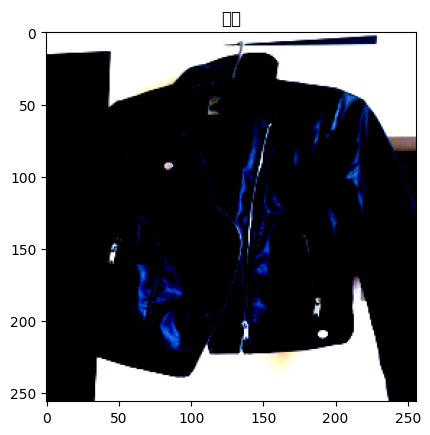

In [46]:
# 定义类别名称的中文对应关系
class_mapping = {
    "battery": "电池",
    "biological": "生物制品",
    "brown-glass": "棕瓶",
    "cardboard": "纸板",
    "clothes": "衣物",
    "green-glass": "绿瓶",
    "metal":"金属",
    "paper":"纸类",
    "plastic":"塑料",
    "shoes":"鞋子",
    "trash":"其他垃圾",
    "white-glass":"白瓶",
}


def show_sample(img, label):
    """
    在 PyTorch 中，图像的张量通常是按照 (C, H, W) 的顺序排列的，其中 C 是通道数，H 是图像的高度，W 是图像的宽度。
    而在 matplotlib 中，图像的通道顺序通常是 (H, W, C)。
    :param img:
    :param label:
    :return:
    """
    class_name = class_mapping[dataset.classes[label]]
    print("标签:", class_name, "(类别编号：" + str(label) + ")")

    # 使用 PyTorch 的 permute 函数交换通道顺序，以适应 matplotlib 的图像显示格式
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_name)
    plt.show()


img, label = dataset[6666]
print(dataset.classes[label])
show_sample(img, label)

数据分布

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

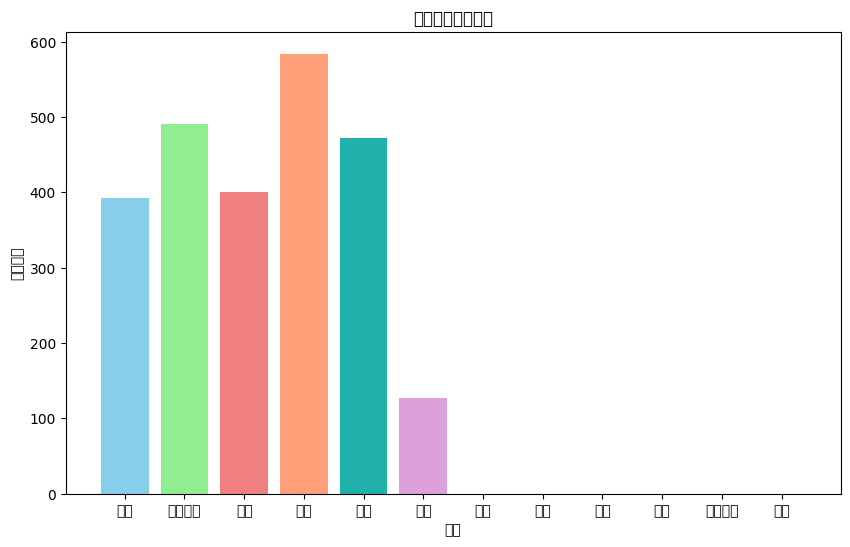

In [47]:
new_categories = list(class_mapping.values())
new_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'plum',
              'cyan', 'lime', 'tomato', 'coral', 'mediumseagreen', 'violet']

counts = [393, 491, 400, 584, 472, 127, 0, 0, 0, 0, 0, 0]
# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(new_categories, counts, color=new_colors)
plt.xlabel('类别')
plt.ylabel('图片数量')
plt.title('不同类别图片分布')
plt.show()


In [48]:
import torch

random_seed = 42
torch.manual_seed(random_seed)  # 将随机数生成器的种子设置为指定的值 可复现
torch.cuda.manual_seed(random_seed)  # 在GPU也这么设置

拆分数据集
一共2527张

In [49]:
from torch.utils.data import random_split

# split_sizes = [1593, 176, 758]
split_sizes = [12412, 1551, 1552]

train_ds, val_ds, test_ds = random_split(dataset, split_sizes)
print("训练集、验证集和测试集大小:")
len(train_ds), len(val_ds), len(test_ds)

训练集、验证集和测试集大小:


(12412, 1551, 1552)

In [50]:
from torch.utils.data.dataloader import DataLoader

# 定义批量大小
batch_size = 42

# 创建训练集 DataLoader
# shuffle=True 表示在每个 epoch 开始时对数据进行洗牌 就是打乱的意思
# num_workers 表示用于数据加载的子进程数量
# pin_memory=True 可以将数据加载到 CUDA 固定内存中，提高数据传输速度
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

# 创建验证集 DataLoader
# batch_size*2 验证集的批量大小是训练集的两倍
val_dl = DataLoader(val_ds, batch_size * 2, num_workers=4, pin_memory=True)

In [51]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


def show_batch(dl, nrow=8):
    """
    :param dl:
    :param nrow: 每行显示的图像数量 默认为8
    :return:
    """
    # 从数据加载器中获取一个批次的图像和标签
    for images, labels in dl:
        # 创建图形和轴
        fig, ax = plt.subplots(figsize=(12, 6))
        # 移除坐标轴的刻度
        ax.set_xticks([])
        ax.set_yticks([])
        # 使用 make_grid 将图像排列成网格，并在显示之前进行通道顺序的转换
        ax.imshow(make_grid(images, nrow=nrow).permute(1, 2, 0))
        break  # 只显示一个批次的图像

# show_batch(train_dl)

基本模型

In [52]:
import torch
import torch.nn.functional as f
import torch.nn as nn


def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(torch.Tensor(preds == labels)).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # 生成预测
        loss = f.cross_entropy(out, labels)  # 计算损失
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  # 生成预测
        loss = f.cross_entropy(out, labels)  # 计算损失
        acc = accuracy(out, labels)  # 计算准确率
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        # 将损失列表转换为张量并计算均值
        batch_losses = torch.stack([x['val_loss'] for x in outputs])
        epoch_loss = batch_losses.mean()

        # 将准确率列表转换为张量并计算均值
        batch_accs = torch.stack([x['val_acc'] for x in outputs])
        epoch_acc = batch_accs.mean()

        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(
            f"第 {epoch + 1} 轮: 训练损失: {result['train_loss']:.4f}, 验证损失: {result['val_loss']:.4f}, 验证准确率: {result['val_acc']:.4f}")


ResNet50

In [53]:
import torchvision.models as models


class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # 使用预训练模型 ResNet-50
        self.network = models.resnet50(pretrained=True)
        self.best_accuracy = 0.0
        self.best_model_state = None  # 最高测试集评分的参数副本
        # 替换最后一层全连接层
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))

    def forward(self, xb):
        # 使用 sigmoid 函数处理输出
#         return torch.sigmoid(self.network(xb))
         # 使用 softmax 函数处理输出
        return f.softmax(self.network(xb), dim=1)
    
    def save_model(self):
        """保存模型"""
        # 转换百分比形式
        accuracy_percent = f'{self.best_accuracy * 100:.2f}%'
        # 保存模型的权重
        # torch.save(self.state_dict(), 'model/model_weights.pth')
        # 整个模型
        # torch.save(self, "model/entire_model.pth")
        # 保存最佳模型参数和整个模型
        best_model_weights_filename = f'/kaggle/working/{accuracy_percent}_model_weights.pth'
        best_model_filename = f'/kaggle/working/{accuracy_percent}_entire_model.pth'
        torch.save(self.best_model_state, best_model_weights_filename)
        torch.save(self, best_model_filename)


# 创建 ResNet 模型实例
self = ResNet()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [54]:
def get_default_device():
    """获取默认设备，如果有 GPU 则选择 GPU，否则选择 CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """将张量（或张量组成的列表/元组）移动到指定的设备"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader:
    """包装数据加载器，将数据移动到指定设备上"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """将数据移动到设备后，产生一个批次的数据"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """批次数量"""
        return len(self.dl)


In [55]:
device = get_default_device()
print("Using device:{}".format(device))

Using device:cuda


In [56]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(self, device)

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

### Training

@torch.no_grad()
告诉 PyTorch 在装饰的代码块中不需要计算梯度。
评估阶段，只关心模型的前向传播，而不需要计算梯度以进行反向传播和参数更新。
在 evaluate 函数中，@torch.no_grad() 装饰器确保了在验证阶段计算损失时不会保存梯度信息，
因为在验证阶段我们只关心模型的性能而不需要进行参数优化。这有助于减少内存占用并提高评估的速度。

In [57]:
import time


@torch.no_grad()
def evaluate(self, val_loader):
    """评估模型在验证集上的性能"""
    self.eval()
    outputs = [self.validation_step(batch) for batch in val_loader]
    return self.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """训练模型并在每个 epoch 结束后在验证集上评估性能"""
    history = []
    optimizer = opt_func(model.parameters(), lr, weight_decay=1e-5)
    start_time = time.time()  # 记录开始时间

    # 第一阶段：冻结层的初始训练
    print("第一阶段训练")
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # 每个 epoch 结束后的验证阶段
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

        end_time = time.time()  # 记录每一轮的结束时间
        epoch_time = end_time - start_time  # 计算每一轮的时间
        print(f"第 {epoch + 1} 轮训练时间: {epoch_time // 60} 分 {epoch_time % 60} 秒")

        # 更新最佳模型参数
        if result['val_acc'] > model.best_accuracy:
            model.best_accuracy = result['val_acc']
            model.best_model_state = model.state_dict()

    model.load_state_dict(model.best_model_state)
    # 解冻层进行微调
    for param in model.parameters():
        param.requires_grad = True

    # 第二阶段：使用较低的学习率进行微调
    optimizer = opt_func(model.parameters(), lr=0.0001)
    print("第二阶段微调")
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # 每个 epoch 结束后的验证阶段
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

        end_time = time.time()  # 记录每一轮的结束时间
        epoch_time = end_time - start_time  # 计算每一轮的时间
        print(f"第 {epoch + 1} 轮训练时间: {epoch_time // 60} 分 {epoch_time % 60} 秒")

        # 更新最佳模型参数
        if result['val_acc'] > model.best_accuracy:
            model.best_accuracy = result['val_acc']
            model.best_model_state = model.state_dict()

    end_time = time.time()  # 记录结束时间
    total_time = end_time - start_time  # 计算总时间
    print(f"训练总时间: {total_time // 60} 分 {total_time % 60} 秒")

    return history


In [58]:
# 预训练GoogleNet
class GoogleNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.best_accuracy = 0.0
        self.best_model_state = None  # 最高测试集评分的参数副本

        self.network = models.googlenet(pretrained=True)

        # 替换最后一层全连接层
        num_ftr_s = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftr_s, len(dataset.classes))

    def forward(self, xb):
         # 使用 softmax 函数处理输出
        return f.softmax(self.network(xb), dim=1)

    def save_model(self):
        """保存模型"""
        # 转换百分比形式
        accuracy_percent = f'{self.best_accuracy * 100:.2f}%'
        # 保存模型的权重
        # torch.save(self.state_dict(), 'model/model_weights.pth')
        # 整个模型
        # torch.save(self, "model/entire_model.pth")
        # 保存最佳模型参数和整个模型
        best_model_weights_filename = f'/kaggle/working/{accuracy_percent}_model_weights.pth'
        best_model_filename = f'/kaggle/working/{accuracy_percent}_entire_model.pth'
        torch.save(self.best_model_state, best_model_weights_filename)
        torch.save(self, best_model_filename)

In [59]:
self = to_device(ResNet(), device)
evaluate(self, val_dl)  # 验证集损失和验证集准确率

{'val_loss': 2.4866249561309814, 'val_acc': 0.0592828243970871}

In [60]:
self = GoogleNet()

In [61]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(self, device)

GoogleNet(
  (network): GoogLeNet(
    (conv1): BasicConv2d(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): BasicConv2d(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv3): BasicConv2d(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (inception3a): Inception(
      (branch1): BasicConv2d(
        (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn):

In [62]:
self = to_device(GoogleNet(), device)
evaluate(self, val_dl)  # 验证集损失和验证集准确率

{'val_loss': 2.488604784011841, 'val_acc': 0.0711875855922699}

开始训练

In [20]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, self, train_dl, val_dl, opt_func)

第一阶段训练
第 1 轮: 训练损失: 1.6436, 验证损失: 1.6538, 验证准确率: 0.9680
第 1 轮训练时间: 1.0 分 21.037803649902344 秒
第 2 轮: 训练损失: 1.6420, 验证损失: 1.6559, 验证准确率: 0.9637
第 2 轮训练时间: 2.0 分 41.92233467102051 秒
第 3 轮: 训练损失: 1.6366, 验证损失: 1.6493, 验证准确率: 0.9711
第 3 轮训练时间: 4.0 分 2.7751083374023438 秒
第 4 轮: 训练损失: 1.6338, 验证损失: 1.6466, 验证准确率: 0.9736
第 4 轮训练时间: 5.0 分 23.672369956970215 秒
第 5 轮: 训练损失: 1.6383, 验证损失: 1.6446, 验证准确率: 0.9762
第 5 轮训练时间: 6.0 分 44.677167892456055 秒
第 6 轮: 训练损失: 1.6324, 验证损失: 1.6448, 验证准确率: 0.9761
第 6 轮训练时间: 8.0 分 5.539546966552734 秒
第 7 轮: 训练损失: 1.6321, 验证损失: 1.6468, 验证准确率: 0.9756
第 7 轮训练时间: 9.0 分 26.454450130462646 秒
第 8 轮: 训练损失: 1.6300, 验证损失: 1.6450, 验证准确率: 0.9755
第 8 轮训练时间: 10.0 分 47.60289025306702 秒
第二阶段微调
第 1 轮: 训练损失: 1.6448, 验证损失: 1.6603, 验证准确率: 0.9618
第 1 轮训练时间: 12.0 分 8.393259763717651 秒
第 2 轮: 训练损失: 1.6477, 验证损失: 1.6632, 验证准确率: 0.9573
第 2 轮训练时间: 13.0 分 29.215770483016968 秒
第 3 轮: 训练损失: 1.6486, 验证损失: 1.6630, 验证准确率: 0.9586
第 3 轮训练时间: 14.0 分 49.976752042770386 秒
第 4 轮: 训练损失: 1.6467, 验证损失: 1.

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)
    for batch in loader:
        images, labels = batch
        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
        all_labels = torch.cat((all_labels, labels), dim=0)
    return all_preds, all_labels

def get_metrics(model, val_dl):
    model.eval()
    all_preds, all_labels = get_all_preds(model, val_dl)
    _, preds = torch.max(all_preds, dim=1)
    
    # 计算混淆矩阵
    cm = confusion_matrix(all_labels.cpu(), preds.cpu())
    
    # 计算准确率
    accuracy = accuracy_score(all_labels.cpu(), preds.cpu())
    
    # 计算精确度、召回率和 F1 值
    precision = precision_score(all_labels.cpu(), preds.cpu(), average='weighted')
    recall = recall_score(all_labels.cpu(), preds.cpu(), average='weighted')
    f1 = f1_score(all_labels.cpu(), preds.cpu(), average='weighted')
    
    return cm, accuracy, precision, recall, f1

# 使用 get_metrics 函数获取评估结果
conf_matrix, accuracy, precision, recall, f1 = get_metrics(self, val_dl)

# 打印评估结果
print("混淆矩阵:")
print(conf_matrix)
print(f"准确率: {accuracy:.4f}")
print(f"精确度: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1 值: {f1:.4f}")


混淆矩阵:
[[ 92   0   0   1   0   0   1   1   0   0   0   1]
 [  0  91   1   0   0   0   0   0   0   0   0   0]
 [  0   3  61   0   0   0   1   0   0   0   0   1]
 [  1   0   1  63   3   0   0   3   0   0   0   0]
 [  0   0   0   0 547   0   0   0   1   4   0   0]
 [  0   0   0   0   0  59   0   0   0   0   0   1]
 [  0   0   0   0   2   0  71   0   1   0   0   2]
 [  2   1   0   1   0   0   0 113   1   1   0   0]
 [  0   2   0   0   0   1   0   0  69   0   0   3]
 [  1   1   1   0   3   0   1   0   0 196   2   0]
 [  1   1   0   0   0   0   0   0   1   0  64   1]
 [  0   0   0   0   0   0   2   0  12   0   0  57]]
准确率: 0.9562
精确度: 0.9570
召回率: 0.9562
F1 值: 0.9562


In [63]:
lr = 0.0001
history2 = fit(num_epochs, lr, self, train_dl, val_dl, opt_func)

第一阶段训练
第 1 轮: 训练损失: 1.9204, 验证损失: 1.7196, 验证准确率: 0.9200
第 1 轮训练时间: 0.0 分 41.66820430755615 秒
第 2 轮: 训练损失: 1.7011, 验证损失: 1.6724, 验证准确率: 0.9541
第 2 轮训练时间: 2.0 分 43.86269950866699 秒
第 3 轮: 训练损失: 1.6658, 验证损失: 1.6625, 验证准确率: 0.9636
第 3 轮训练时间: 3.0 分 25.801296710968018 秒
第 4 轮: 训练损失: 1.6496, 验证损失: 1.6610, 验证准确率: 0.9615
第 4 轮训练时间: 4.0 分 7.919692039489746 秒
第 5 轮: 训练损失: 1.6413, 验证损失: 1.6531, 验证准确率: 0.9730
第 5 轮训练时间: 4.0 分 49.921000242233276 秒
第 6 轮: 训练损失: 1.6364, 验证损失: 1.6505, 验证准确率: 0.9741
第 6 轮训练时间: 5.0 分 32.464208364486694 秒
第 7 轮: 训练损失: 1.6322, 验证损失: 1.6573, 验证准确率: 0.9610
第 7 轮训练时间: 6.0 分 14.621957540512085 秒
第 8 轮: 训练损失: 1.6319, 验证损失: 1.6533, 验证准确率: 0.9673
第 8 轮训练时间: 6.0 分 56.55752992630005 秒
第二阶段微调
第 1 轮: 训练损失: 1.6307, 验证损失: 1.6531, 验证准确率: 0.9711
第 1 轮训练时间: 7.0 分 38.542879581451416 秒
第 2 轮: 训练损失: 1.6298, 验证损失: 1.6501, 验证准确率: 0.9717
第 2 轮训练时间: 8.0 分 20.79662537574768 秒
第 3 轮: 训练损失: 1.6284, 验证损失: 1.6475, 验证准确率: 0.9748
第 3 轮训练时间: 9.0 分 2.66668701171875 秒
第 4 轮: 训练损失: 1.6280, 验证损失: 1.6489, 验

In [64]:
# 使用 get_metrics 函数获取评估结果
conf_matrix, accuracy, precision, recall, f1 = get_metrics(self, val_dl)

# 打印评估结果
print("混淆矩阵:")
print(conf_matrix)
print(f"准确率: {accuracy:.4f}")
print(f"精确度: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1 值: {f1:.4f}")

混淆矩阵:
[[ 88   2   1   2   0   0   2   0   0   0   1   0]
 [  0  91   0   1   0   0   0   0   0   0   0   0]
 [  0   2  62   0   0   0   1   0   0   0   0   1]
 [  0   0   0  67   0   0   1   3   0   0   0   0]
 [  0   1   0   0 548   0   0   0   0   3   0   0]
 [  0   0   0   0   0  59   1   0   0   0   0   0]
 [  0   0   0   0   0   0  74   0   0   2   0   0]
 [  1   0   0   1   1   0   1 114   0   1   0   0]
 [  0   2   0   0   0   0   1   2  67   1   0   2]
 [  0   1   0   0   2   0   0   0   0 202   0   0]
 [  0   1   0   0   1   0   0   0   0   0  66   0]
 [  0   0   1   0   0   0   9   1   1   0   2  57]]
准确率: 0.9639
精确度: 0.9656
召回率: 0.9639
F1 值: 0.9638


In [73]:
self.save_model()

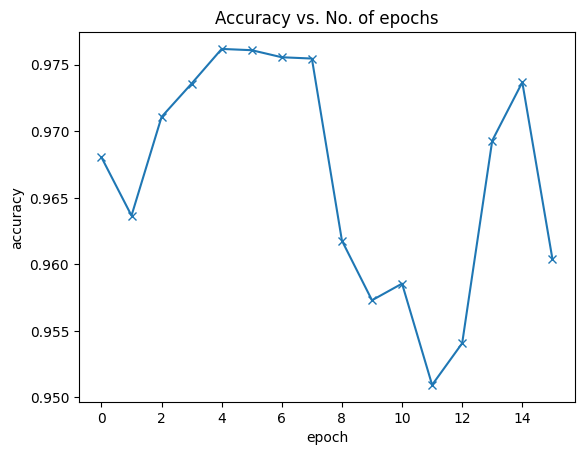

In [29]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')


plot_accuracies(history)

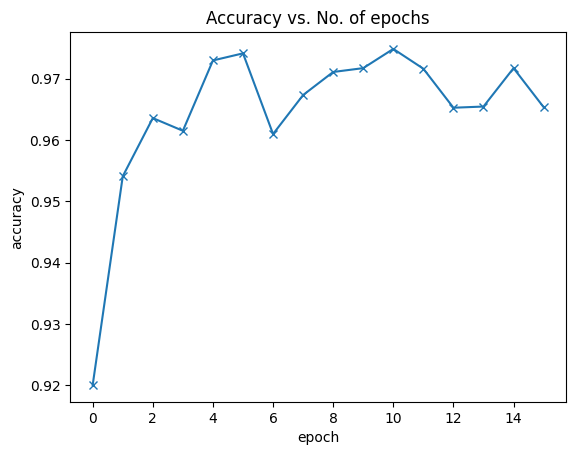

In [65]:
plot_accuracies(history2)

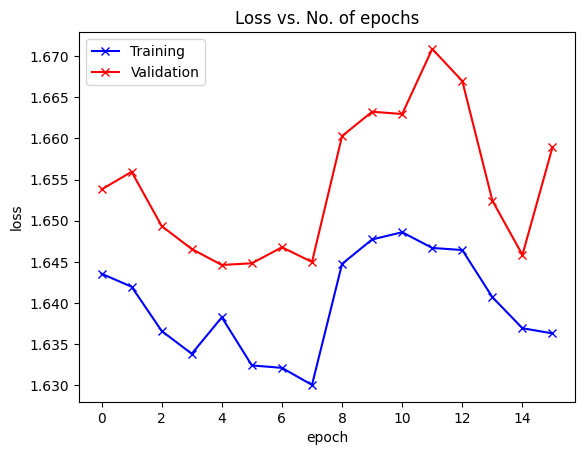

In [31]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')


plot_losses(history)

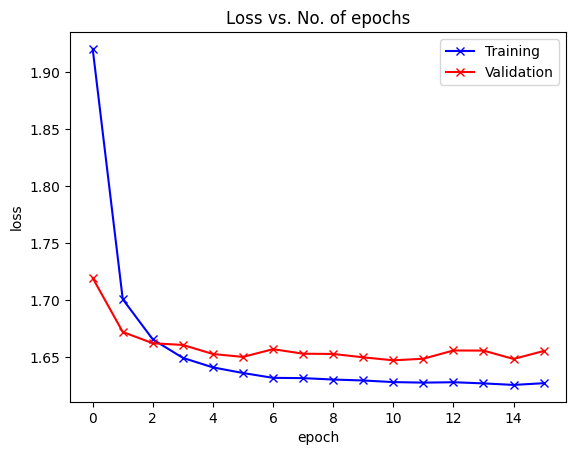

In [66]:
plot_losses(history2)

In [70]:
# 保存模型参数
# torch.save(self.state_dict(), '/kaggle/working/model_weights.pth')
self.save_model()

In [ ]:
self2.save_model()

In [76]:
# 保存模型的状态字典
torch.save(self.state_dict(), '666.pth')